# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split #Used to split data set into training and testing
import csv

# Importing and splitting dataset

In [2]:
file = open("audi.csv")
tester = csv.reader(file)

rows = []
for row in tester:
        rows.append(row)
rows.pop(0)
# print(rows)
# csv_file = (r'UKUsedCarDataSet\audi.csv')
# txt_file = ('test.txt')
# with open(txt_file, "w") as my_output_file:
#     with open(csv_file, "r") as my_input_file:
#         [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
#     my_output_file.close()

test = pd.read_csv("audi.csv", quotechar='"', skipinitialspace=True)


Y = test.price
X = test.drop(['price', 'model', 'transmission', 'fuelType'], axis = 1) 
X = X.head(200)
Y = Y.head(200)
print(test)

# X = X.reset_index()
# X = X.drop(0)
# X = test.drop('model', axis = 1)
#             ('transmission', 'fuelType')
# print(X)

# Y = np.genfromtxt("audi.csv", delimiter = ",", skip_header = 1, usecols=(2)) #label is price
# print(Y)
# X = np.genfromtxt("audi.csv", delimiter = ",", skip_header = 1, usecols=(1, 4, 6, 7, 8)) #, dtype=int
# X = np.genfromtxt("audi.csv", delimiter = ",", skip_header = 1, usecols=(1, 4, 7))
# print(X)
# Xpend = []
# Ypend = []
# for i in range(1,200):
#     Xpend.append(X[i])
#     Ypend.append(Y[i])
# print(Xpend)

      model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2        A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6         1.0
10665    A3  2020  17199       Manual      609   Petrol  150  49.6         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9         1.4
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9         1.4

[10668 rows x 9 columns]


In [6]:
# dataLocation = (r'UKUsedCarDataSet\audi.csv')
# dataSet = pd.read_csv(dataLocation, nrows=200)
# Specific_Rows = dataSet.sample(n=200)
# features = ['year', 'mileage', 'tax', 'mpg', 'engineSize'] #may try transmission and fuel type later

# X = dataSet[features]
# Y = dataSet['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 601)
# print(X)
# print(X_train.shape)
# print(X_train[3])

# KNN using Scikit-Learn

In [34]:
knn = KNN_Reg(n_neighbors = 50)
knn.fit(X_train, Y_train)
print(knn.score(X_test, Y_test))

0.015431270120029095


Text(0, 0.5, 'Error rate (%)')

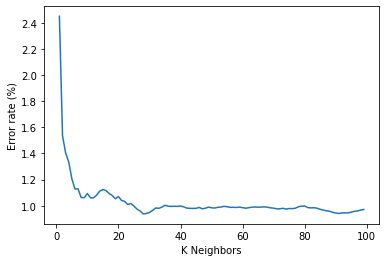

In [36]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg

results = np.empty(99)
for k in range(1, 100):
    knn = KNN_Reg(n_neighbors = k)
    knn.fit(X_train, Y_train)
    results[k - 1] = (1 - knn.score(X_test, Y_test))

plt.plot(np.arange(99) + 1, results)
plt.xlabel('K Neighbors')
plt.ylabel('Error rate (%)')

# Euclidean Distance

In [9]:
def eucDistance(variable1, variable2):
    distance = 0
    for i in range(len(variable2)):
        distance += (variable1[i] - variable1[i])**2
    return np.sqrt(distance)

# KNN

In [10]:
def kNN(train, testRow, yTrain, yTest, num):
    distance = list() #Stores distance of each point
    for i in range(len(train)-1):
        dist = eucDistance(train.iloc[i], testRow) #sends points to work out distance
        distance.append((train.iloc[i], dist, yTrain.iloc[i])) 
    distance = sort(distance) #need to create a sort method to order list
    kNeighbours = list() #list to store K amount of neighbour results
    for i in range(num):
        kNeighbours.append((testRow, distance[i][1], distance[i][2]))
    return kNeighbours 

# for testRow in X_test:
#     kNN(X_train, testRow, Y_train, Y_test, 1)
# print(kNN(X_train, X_test[1], Y_train, Y_test, 1))

# Sort Method

In [11]:
def sort(dist):
    for i in range(0, len(dist)):
        for j in range(0, len(dist) - i - 1):
            if (dist[j][1] > dist[j + 1][1]):
                temp = dist[j]
                dist[j] = dist[j + 1]
                dist[j + 1] = temp
    return dist

# Predict Method

In [12]:
from statistics import mean 

def predict(train, test, yTrain, yTest, num_neighbors):
    predictions = list()
#     print(test)
    for i in range(len(test)): #Sends each test variable
        neighbour = kNN(train, test.iloc[i], yTrain, yTest, num_neighbors)
        print("\ntest.iloc[i]: ", test.iloc[i])
        print("\nneighbour ",neighbour)
        labels = [] #Stores yTrain for each test variable
        for i in range (len(neighbour)):
            t = labels.append(neighbour[i][2]) #Appends yTrain
#             print(neighbour[i][2])
#             print(neighbour[i])
#         predictions.append(max(labels, key = labels.count)) #works out mode of the labels
        predictions.append(mean(labels))
        print(mean(labels))
    return predictions

# Evaluation Method

In [13]:
def eva(train, test, yTrain, yTest):
    numbErr = np.empty(100)
    for k in range(1, 101): #Testing up to 100 neearest neighbours
        y_pred = predict(train, test, yTrain, yTest, k)
#         print(y_pred)
        wrongSum = 0
#         for i in range(len(yTest)):
#             if (y_pred[i] != yTest.iloc[i]):
#                 print ("pred:", y_pred[i])
#                 print ("test:", yTest.iloc[i])
#                 wrongSum += 1
#         numbErr[k - 1] = (wrongSum/len(yTest)) #amount wrong dived by size of test size
        numbErr[k-1] = y_pred
#     plt.plot(np.arange(100) + 1, numbErr)
#     plt.plot(test, Y_test)
#     plt.xlabel('K Neighbors')
#     plt.ylabel('Real Answers')
    
    plt.plot(np.arange(100) + 1, numbErr)
    plt.xlabel('K Neighbors')
    plt.ylabel('Real Answers')
        
    return numbErr

In [14]:
eva(X_train, X_test, Y_train, Y_test)


test.iloc[i]:  year           2015.0
mileage       34646.0
tax              30.0
mpg              61.4
engineSize        2.0
Name: 183, dtype: float64

neighbour  [(year           2015.0
mileage       34646.0
tax              30.0
mpg              61.4
engineSize        2.0
Name: 183, dtype: float64, 0.0, 11750)]
11750

test.iloc[i]:  year           2017.0
mileage       44898.0
tax             125.0
mpg              57.7
engineSize        2.0
Name: 63, dtype: float64

neighbour  [(year           2017.0
mileage       44898.0
tax             125.0
mpg              57.7
engineSize        2.0
Name: 63, dtype: float64, 0.0, 11750)]
11750

test.iloc[i]:  year           2018.0
mileage       42209.0
tax             145.0
mpg              42.2
engineSize        2.0
Name: 161, dtype: float64

neighbour  [(year           2018.0
mileage       42209.0
tax             145.0
mpg              42.2
engineSize        2.0
Name: 161, dtype: float64, 0.0, 11750)]
11750

test.iloc[i]:  year           2017.


test.iloc[i]:  year          2019.0
mileage       5000.0
tax            145.0
mpg             38.7
engineSize       2.0
Name: 100, dtype: float64

neighbour  [(year          2019.0
mileage       5000.0
tax            145.0
mpg             38.7
engineSize       2.0
Name: 100, dtype: float64, 0.0, 11750)]
11750

test.iloc[i]:  year           2016.0
mileage       79728.0
tax              30.0
mpg              64.2
engineSize        2.0
Name: 149, dtype: float64

neighbour  [(year           2016.0
mileage       79728.0
tax              30.0
mpg              64.2
engineSize        2.0
Name: 149, dtype: float64, 0.0, 11750)]
11750

test.iloc[i]:  year           2016.0
mileage       97440.0
tax              20.0
mpg              70.6
engineSize        2.0
Name: 66, dtype: float64

neighbour  [(year           2016.0
mileage       97440.0
tax              20.0
mpg              70.6
engineSize        2.0
Name: 66, dtype: float64, 0.0, 11750)]
11750

test.iloc[i]:  year           2015.0
mileage 

ValueError: setting an array element with a sequence.

# 1NN

In [23]:
def NN(train, test, yTrain, yTest):    
    numbErr = 0
    y_pred = predict(train, test, yTrain, yTest, 1)
    wrongSum = 0
    for i in range(len(yTest)):
#     for i in range(1,3):
        if (y_pred[i] != yTest.iloc[i]):
            wrongSum += 1
#             print(y_pred[i])
#             print(yTest.iloc[i])
            
    numbErr = (wrongSum/len(yTest))
    print("Number of Errors:", wrongSum)
    print("Test Error Rate:", numbErr)
    return numbErr

NN(X_train, X_test, Y_train, Y_test)


test.iloc[i]:  year           2015.0
mileage       34646.0
tax              30.0
mpg              61.4
engineSize        2.0
Name: 183, dtype: float64

neighbour  [(year           2015.0
mileage       34646.0
tax              30.0
mpg              61.4
engineSize        2.0
Name: 183, dtype: float64, 0.0, 11750)]
11750

test.iloc[i]:  year           2017.0
mileage       44898.0
tax             125.0
mpg              57.7
engineSize        2.0
Name: 63, dtype: float64

neighbour  [(year           2017.0
mileage       44898.0
tax             125.0
mpg              57.7
engineSize        2.0
Name: 63, dtype: float64, 0.0, 11750)]
11750

test.iloc[i]:  year           2018.0
mileage       42209.0
tax             145.0
mpg              42.2
engineSize        2.0
Name: 161, dtype: float64

neighbour  [(year           2018.0
mileage       42209.0
tax             145.0
mpg              42.2
engineSize        2.0
Name: 161, dtype: float64, 0.0, 11750)]
11750

test.iloc[i]:  year           2017.


test.iloc[i]:  year           2016.0
mileage       79728.0
tax              30.0
mpg              64.2
engineSize        2.0
Name: 149, dtype: float64

neighbour  [(year           2016.0
mileage       79728.0
tax              30.0
mpg              64.2
engineSize        2.0
Name: 149, dtype: float64, 0.0, 11750)]
11750

test.iloc[i]:  year           2016.0
mileage       97440.0
tax              20.0
mpg              70.6
engineSize        2.0
Name: 66, dtype: float64

neighbour  [(year           2016.0
mileage       97440.0
tax              20.0
mpg              70.6
engineSize        2.0
Name: 66, dtype: float64, 0.0, 11750)]
11750

test.iloc[i]:  year           2015.0
mileage       75619.0
tax              20.0
mpg              68.9
engineSize        2.0
Name: 40, dtype: float64

neighbour  [(year           2015.0
mileage       75619.0
tax              20.0
mpg              68.9
engineSize        2.0
Name: 40, dtype: float64, 0.0, 11750)]
11750

test.iloc[i]:  year           2016.0


1.0